In [1]:

import numpy as np

norm='abs'
fmin=1
fmax=2

Pmin=51
Pmax=200

bin_length=1/64
seg_length=16


mod_min=np.radians(-90)
mod_max=np.radians(90)
mod_bin_number=20
J=mod_bin_number
spur_sub=True
coherence_corrector=False
output_file='/home/c2032014/cygx1_paper/qpo_finder_abs_stack_test.npy'

aspace = np.linspace(mod_min, mod_max, mod_bin_number + 1)
mod_min_array = aspace[:-1]
mod_max_array = aspace[1:]
av_mod = (mod_min_array + mod_max_array) / 2
av_mod_err = (mod_max_array - mod_min_array) / 2

In [2]:
import os
import glob
def get_obs_file_pairs(obs_folder, obs_names):
    """
    Collects file1, file2, and gti paths for each observation.
    
    Args:
        obs_folder (str): Path to the folder containing observations.
        obs_names (list): List of observation directory names.
        file1_suffix (str): Filename suffix for file1.
        file2_suffix (str): Filename suffix for file2.
        gti_suffix (str): Filename suffix for GTI file.

    Returns:
        list of tuples: [(file1, file2, gti), ...]
    """
    obs_triplets = []
    for obs in obs_names:
        full_dir = os.path.join(obs_folder, obs)
        gti_path  = os.path.join(full_dir,  f"GTI_ixpe{obs}_evt2_v0*.txt")
        gti = glob.glob(gti_path)[0]
        full_dir = os.path.join(full_dir, "event_1pt5")
        file1_path = os.path.join(full_dir,  f"ixpe{obs}_det12*.fits")
        #print(file1_path)
        file1 = glob.glob(file1_path)[0]
        file2_path = os.path.join(full_dir, f"ixpe{obs}_det3*.fits")
        file2 = glob.glob(file2_path)[0]
        obs_triplets.append((file1, file2, gti))
    return obs_triplets


obs_dir='/home/c2032014/cygx1_paper/cyg_data_all'
obs_names=['01002901','01250101','03002201','03003101','03010001','03010101']
obs_triplets=get_obs_file_pairs(obs_dir, obs_names)

G_null_cpf_real [0.07584064485594881, 0.07584064485594881, 0.07584064485594881, 0.07584064485594881, 0.07584064485594881, 0.07584064485594881, 0.07584064485594881, 0.07584064485594881, 0.07584064485594881, 0.07584064485594881, 0.07584064485594881, 0.07584064485594881, 0.07584064485594881, 0.07584064485594881, 0.07584064485594881, 0.07584064485594881, 0.07584064485594881, 0.07584064485594881, 0.07584064485594881, 0.07584064485594881]
G_null_cpf_real [0.07584064485594881, 0.07584064485594881, 0.07584064485594881, 0.07584064485594881, 0.07584064485594881, 0.07584064485594881, 0.07584064485594881, 0.07584064485594881, 0.07584064485594881, 0.07584064485594881, 0.07584064485594881, 0.07584064485594881, 0.07584064485594881, 0.07584064485594881, 0.07584064485594881, 0.07584064485594881, 0.07584064485594881, 0.07584064485594881, 0.07584064485594881, 0.07584064485594881]
G_null_cpf_imag [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
G_null_cpf_real [0.12175101830310817, 0.12175101830310817, 0.1217510

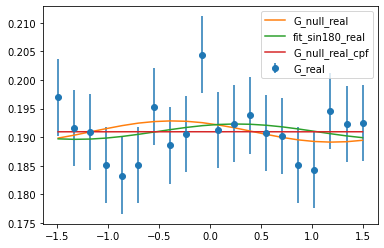

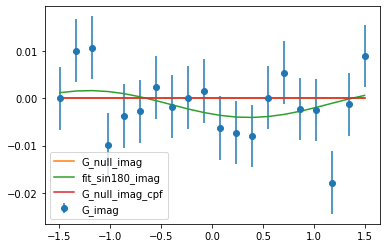

In [3]:
import QPO_finder_abs_stack as qpo
import importlib
importlib.reload(qpo)

qpo.run_QPO_finder_absolute_stacked(obs_dir,obs_names,Pmin,Pmax,bin_length,seg_length,fmin,fmax,mod_bin_number,spur_sub,coherence_corrector,output_file)


Text(0, 0.5, '$\\Im [G]$')

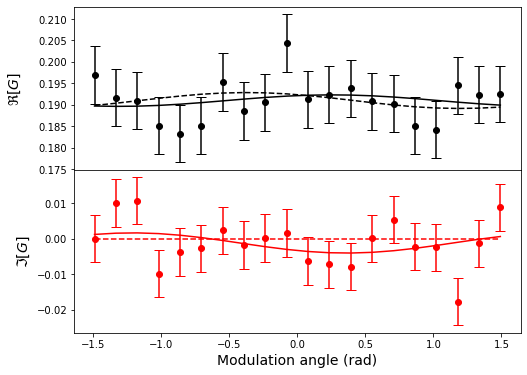

In [21]:
result=np.transpose(np.loadtxt(output_file))
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(8, 6), gridspec_kw={'hspace': 0})
ax1.errorbar(result[0], result[1], yerr=result[5], fmt='o', label='G_real',color='black',capsize=5)
ax1.plot(result[0], result[3],label='G_null_real',ls='--',color='black')
ax1.plot(result[0], result[6], label='G_fit_real',color='black')
ax1.set_ylabel(r'$\Re [G]$', fontsize=14,labelpad=15)
ax2.errorbar(result[0], result[2], yerr=result[5], fmt='o', label='G_imag',color='red',capsize=5)
ax2.plot(result[0], result[4],  label='G_null_imag',ls='--',color='red')
ax2.plot(result[0], result[7], label='G_fit_imag',color='red')
ax2.set_xlabel('Modulation angle (rad)', fontsize=14)
ax2.set_ylabel(r'$\Im [G]$', fontsize=14)
#plt.savefig('G_real_imag.pdf', dpi=10000)